# <span style='background :Red' >**INTRODUCTION**</span>

### Every year, there are more then 800,000 people who take their own life, and many more suicides are attempted. <span style='color:Blue'>*In other words, there is one suicide in the world every 40 seconds*</span>. Suicide happens globally across ages and genders with different rates. In the United States, it is the second leading cause of death for people aged 15-29, and the tenth leading cause of death for all ages. Suicide is a serious problem worldwide, but it is the most preventable when comparing to other leading causes of death. The first-ever Mental Health Action Plan of the World Health Organization was conducted in May 2013. The goal is to reduce the suicide rate by 10% by 2020 in nations.

### Here, I analyze suicide rates across the world. The goal is to provide an insight into this topic and hope this data can be used to prevent suicides in the future.




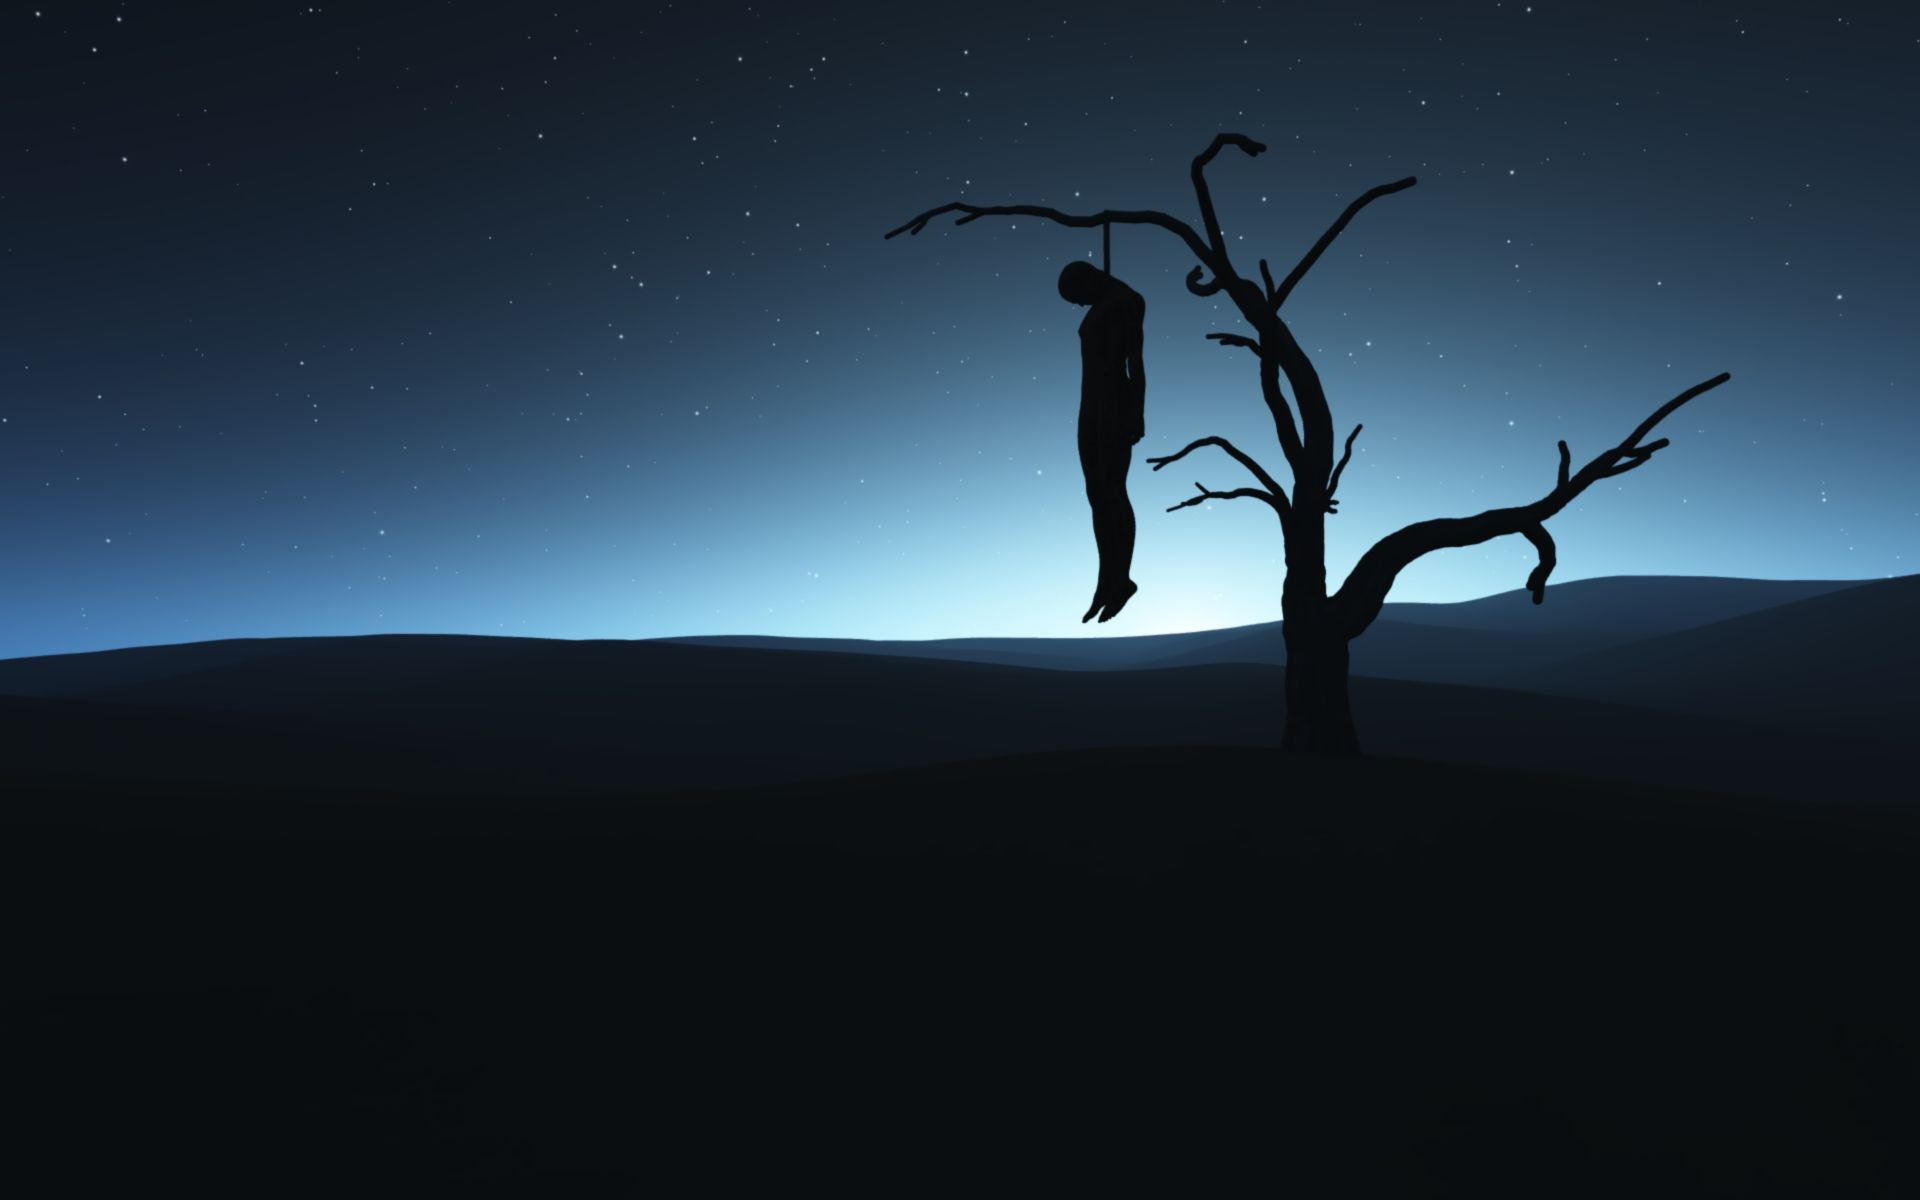

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install geonamescache
import geonamescache

In [21]:
df = pd.read_csv("E:\suicides.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [10]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [61]:
df.age.value_counts()

75+ years      4642
25-34 years    4642
15-24 years    4642
35-54 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

# <span style='color:Pink'> TOTAL NUMBER OF SUICIDES BY EVERY COUNTRY</span>

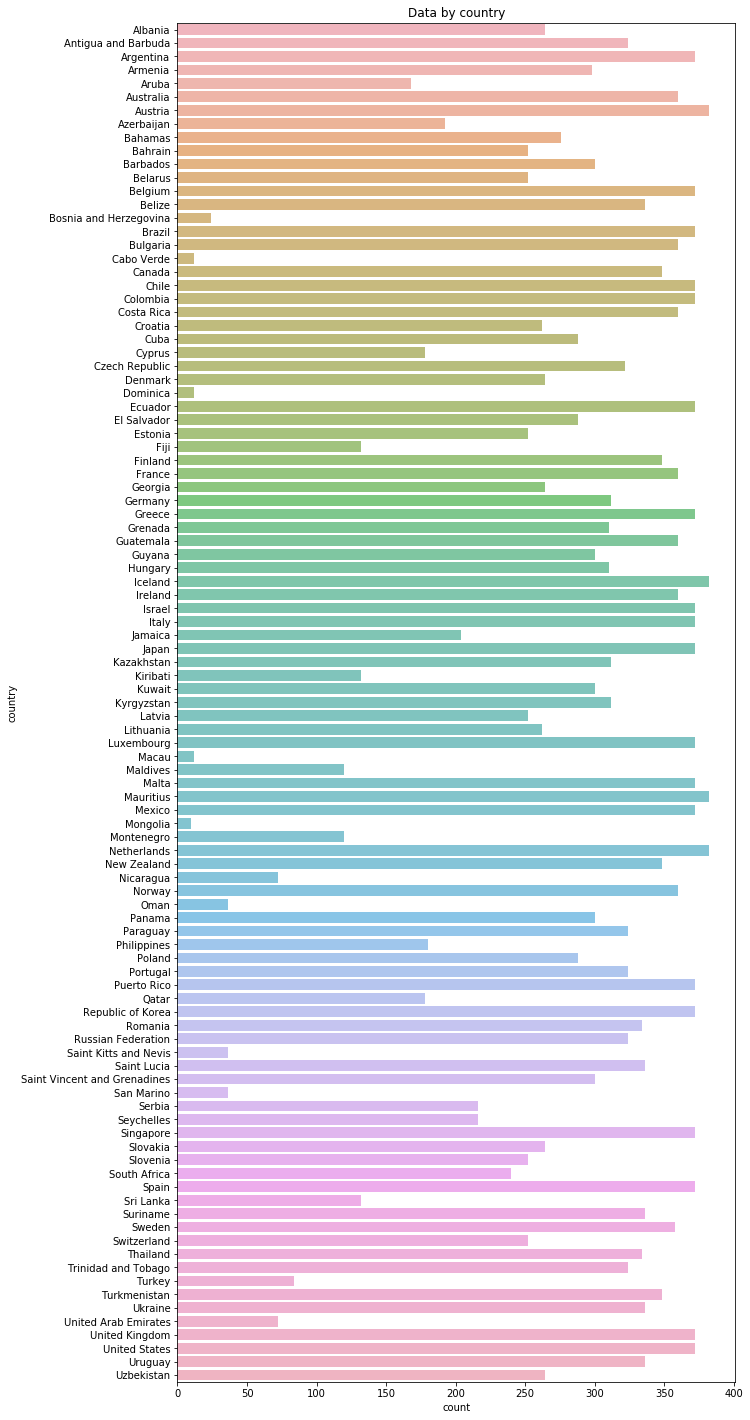

In [51]:

alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df, alpha=alpha)
plt.title('Data by country')
plt.show()

# For better understanding I have created a bar raching chart of suicide rates of different countries

 ## https://public.flourish.studio/visualisation/2911437
 ###  <span style='background :pink' > By this graph we can see the highest number of suicides were done in Russia from 1990-2009 but from 2015 USA had more number of suicides.

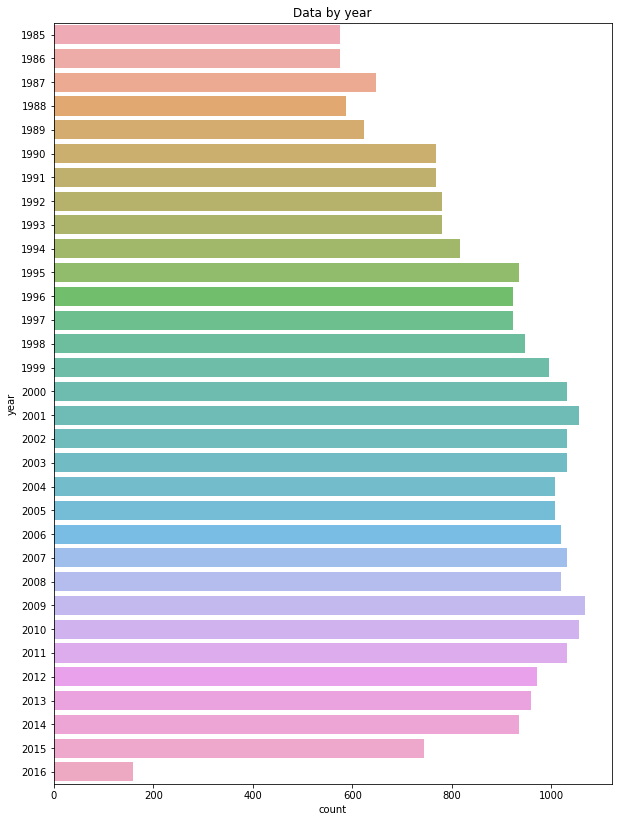

In [24]:
alpha = 0.8  
plt.figure(figsize=(10,14))  
sns.countplot(y='year', data=df, alpha=alpha)
plt.title('Data by year')
plt.show()

## <span style='background :yellow' > GENDER DIFFERENCE </span>

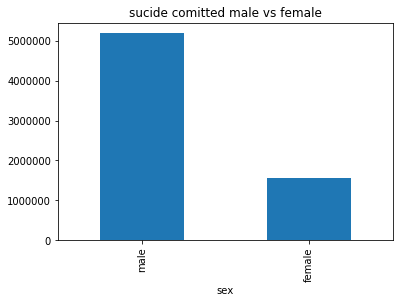

In [43]:
df.groupby('sex')['suicides_no'].agg('sum').sort_values(ascending=False).plot(kind='bar',title='suicide comitted male vs female')

# <span style='color:red'>BAR RACE GRAPH TO UNDERSTAND GENDER DIFFERENCE IN SUICIDE RATES</span>

## https://public.flourish.studio/visualisation/2912104/

### In countries around the world, women are more likely to be diagnosed with depression and to attempt suicide. So why is the male suicide rate still several times higher than female? 

#### <span style='background :pink' >One of the most important reasons for the difference between suicide attempts and completed suicides between men and women is the method of suicide used.Men tend to choose violent (more lethal) suicide methods, such as firearms, hanging, and asphyxiation, whereas women are more likely to overdose on medications or drugs</span>


# <span style='color:purple'> AGE WISE DISTRIBUTION OF MALES AND FEMALES </span>

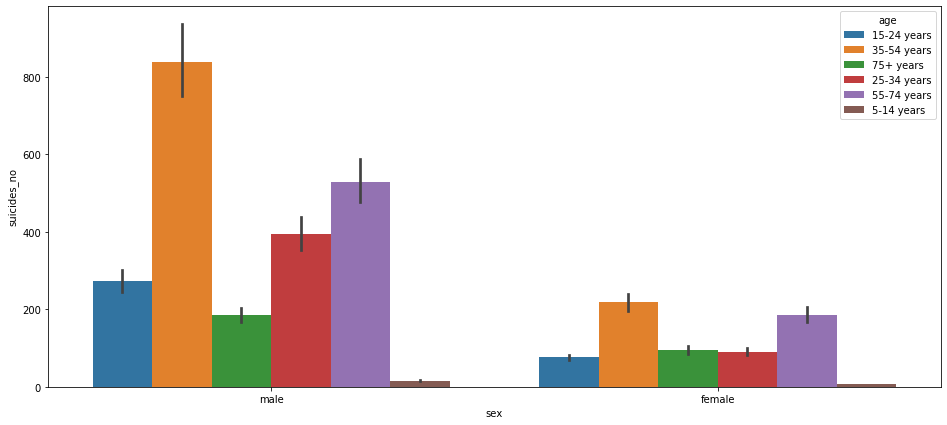

In [13]:
plt.figure(figsize=(16,7))

bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)

## Bar graph for age wise distribution

## <span style='background :yellow' > https://public.flourish.studio/visualisation/2912425/ </span>

# <span style='color:orange'> AGE WISE SUICIDE FREQUENCY</span>

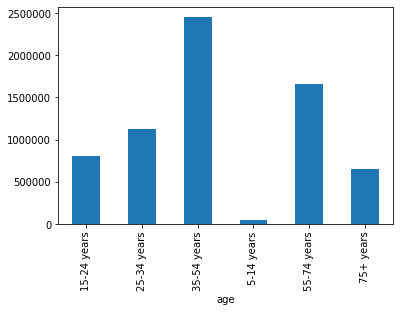

In [25]:
df.groupby('age')['suicides_no'].agg('sum').plot(kind='bar')

####  Young adults aged 18 to 25 are at higher risk for suicidal thoughts and attempts than other age groups. However, adults aged 35 to 64 have higher rates of death from suicides than other age groups. Additionally, the suicide rate (i.e., the death rate from suicide) has significantly increased over the years for those aged 45 to 64, higher than any other age group. This increase is seen for both male and female adults aged 45 to 64. The percentage of adults aged 45 to 64 who had serious thoughts of suicide and attempted suicide remained stable from 2009 to 2014. Additional research is needed to examine why there is this incongruity between risk for suicidal thoughts and attempts and death rates for suicide among middle aged persons.

# <span style='color:green'>What about suicide rates globally and country wise?</span>

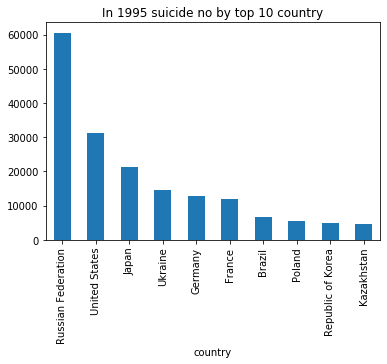

In [53]:
mask34=df['year']==1995
df_2010=df[mask34]
df_2010.groupby('country')['suicides_no'].agg('sum').sort_values(ascending=False).head(10).plot(kind='bar',title='In 1995 suicide no by top 10 country')

## <span style='background :yellow' > In the year 1995(highest suicide rate year) Russian federation was at top. </span>

In [19]:
df_pie=df.groupby('country')['suicides_no'].agg('sum').sort_values(ascending=False).head(10) 
df_pie

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

#### <span style='background :orange' > The most number of suicides have been committed in RUSSIA. The most plausible explanation in this situation is that heavy drinking and suicide are both caused by some other variable such as the anomic conditions of the Russian transition.In 2012, the rate of teenage suicides in Russia was triple the world average.</span>

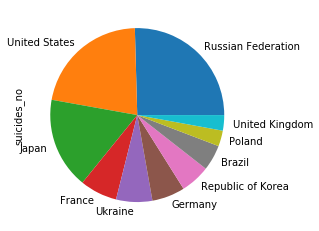

In [20]:
df_pie.plot(kind='pie')


### <span style='background :RED' > These were the top ten countries in suicides rates till 2016 </span>

# <span style='color:dky blue'> What about suicide rates per decade? </span>

Text(0.5, 1.0, 'year vs Suicides')

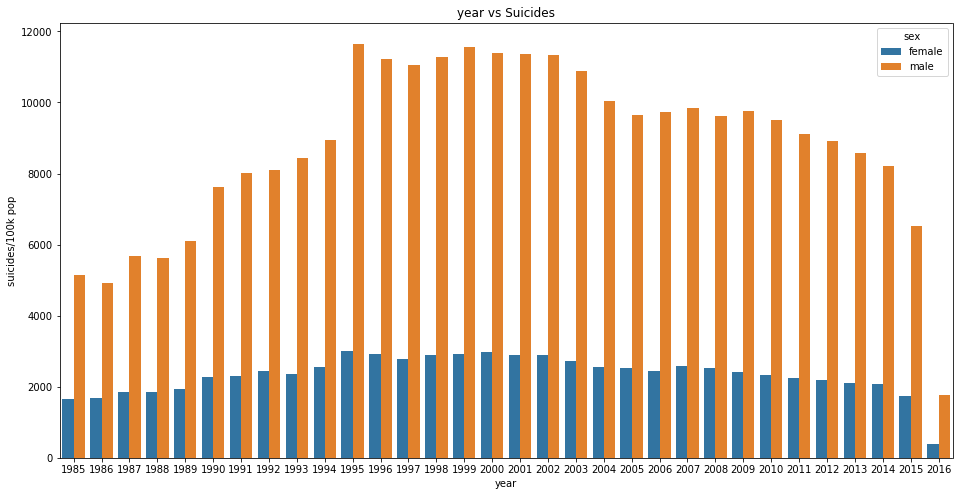

In [41]:

   plt.figure(figsize=(16,8))
sns.barplot(x = "year", y = "suicides/100k pop", hue = "sex",data = df.groupby(["year","sex"]).sum().reset_index()).set_title("year vs Suicides")


###  <span style='background :yellow' > The suicide rates were at peak in the year 1995 which cleary decreased over time. Female suicide rates are drastically lower than men.</span>

# CONCLUSIONS
 - Men have a high risk of committing suicide then women.
 - Adult people age between 25-50 are at the highest risk among all age groups.
 - Rate of suicide sky rocketed around 1995 but since 2009 it has been decreasing but, since we have the data till 2016 we can't confim the pattern.
 
 

# Here is a story visualization of the Bargraphs

## https://public.flourish.studio/story/427259/

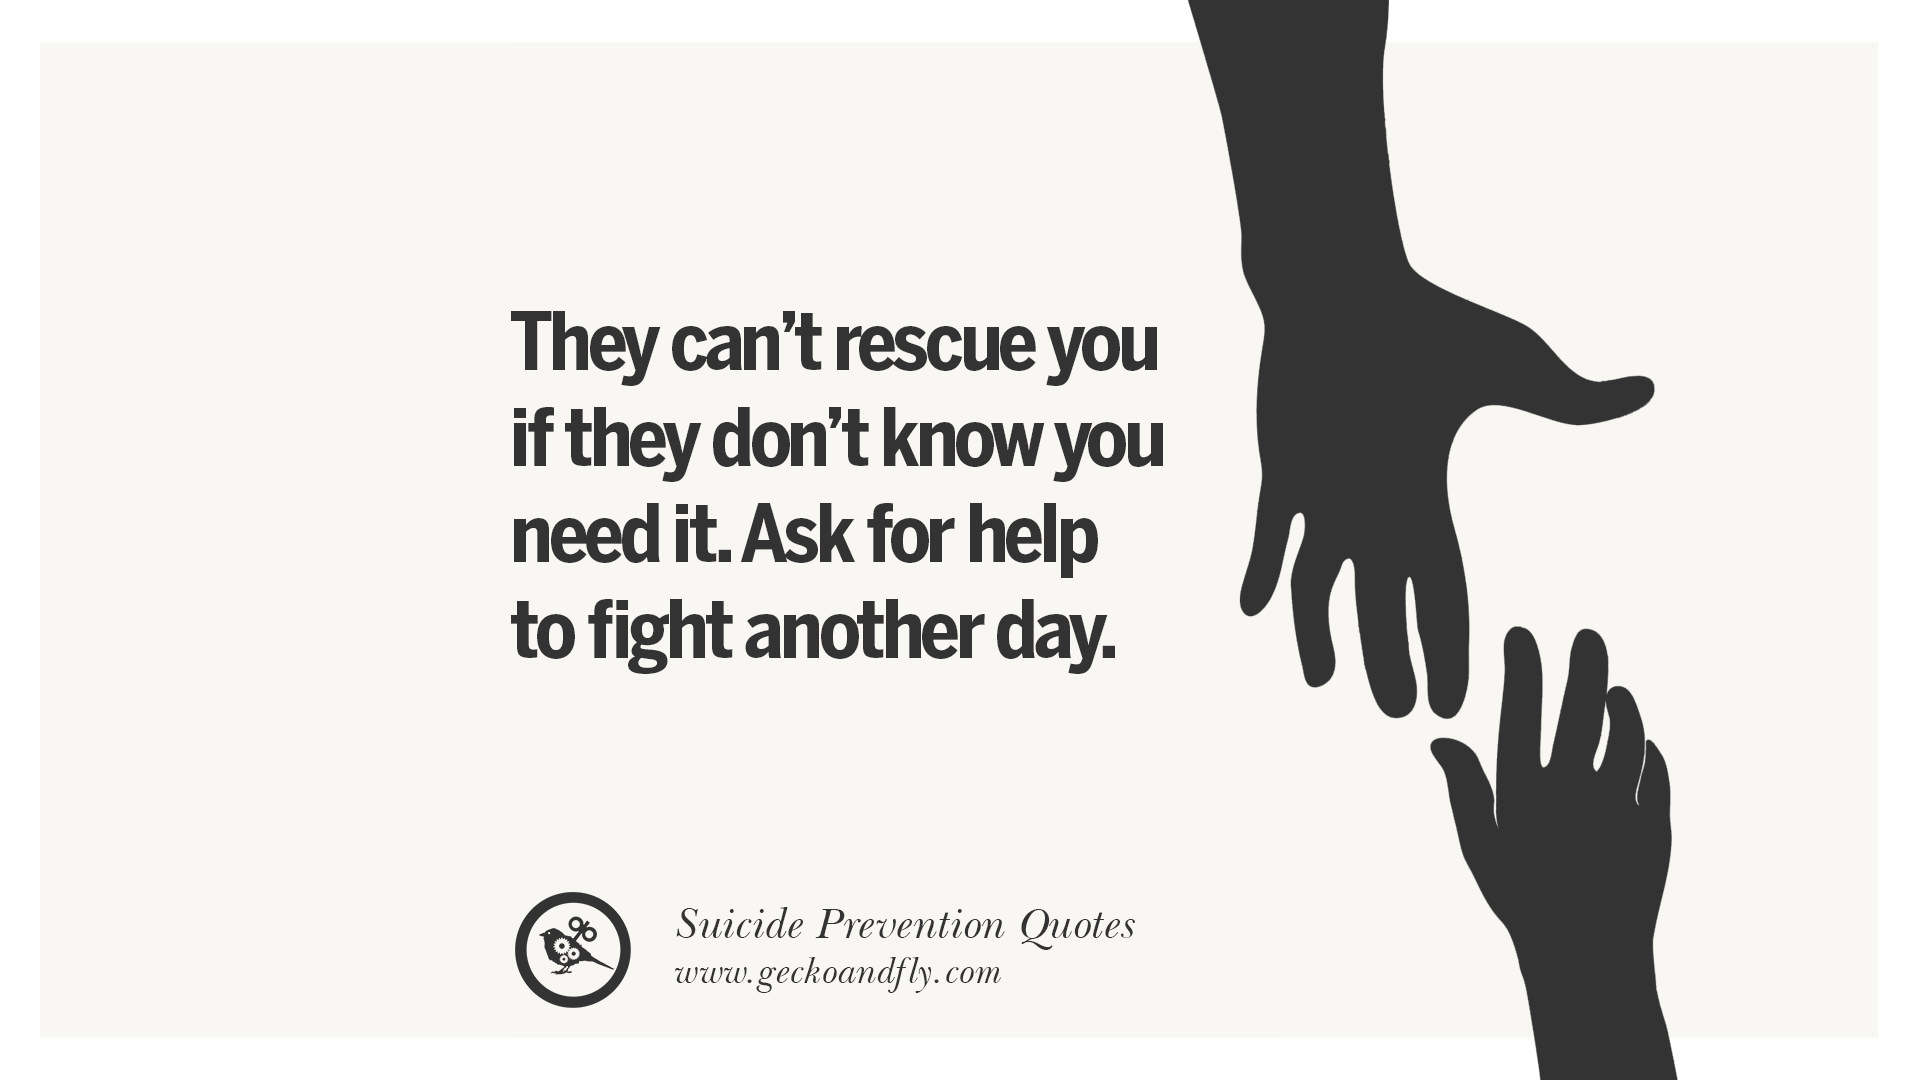

## If you're having suicidal thoughts, please call suicide helpline!

## Suicide helpline numbers - http://www.suicide.org/international-suicide-hotlines.html